In [28]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [29]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.shape

(25, 2)

In [31]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
#checking for 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

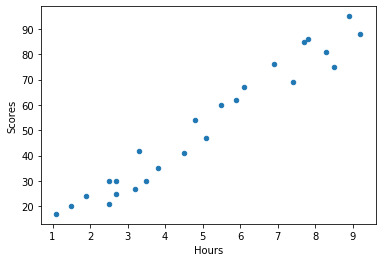

In [34]:
df.plot(kind='scatter', x='Hours', y='Scores') ;
plt.show()

### showing the scores of student per hour study

Using bar graph

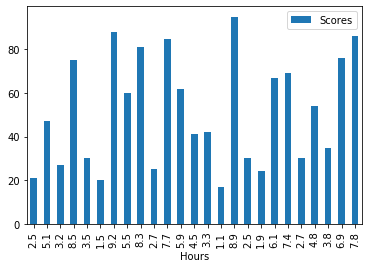

In [35]:
df.plot(kind='bar', x='Hours', y='Scores') ;
plt.show()

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [36]:
x = df.iloc[:, :-1].values  
x =x.reshape(-1,1)
y = df.iloc[:, 1].values 
y =y.reshape(-1,1)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0 )

# predictions using linear regression

In [38]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

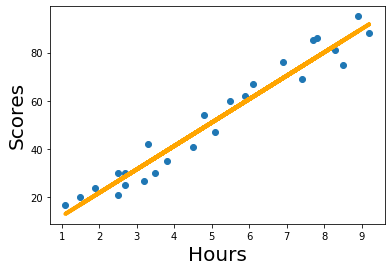

In [39]:
plt.scatter(x,y)
line = reg.coef_*x+reg.intercept_
fig = plt.plot(x,line, lw=4, c='orange', label ='regression line')
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

In [40]:
y_pred = reg.predict(x_test)

In [41]:
hours = np.array(9.25)
hours= hours.reshape(-1,1)
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
    


No of Hours = [[9.25]]
Predicted Score = [92.14523315]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
# Evaluating the model
from sklearn.metrics import *

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared value', r2_score( y_test,y_pred))

Mean Absolute Error: 4.691397441397446
Mean Squared Error: 25.463280738222593
Root Mean Squared Error: 5.046115410711748
R-Squared value 0.9555700801388128


# Using KNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [44]:
knn = KNN(n_neighbors = 5)

# Fitting the model
knn.fit(x_train, y_train)

# Predicting over the Train Set and calculating MSE
test_predict = knn.predict(x_test)

In [45]:
hours = np.array(9.25)
hours= hours.reshape(-1,1)
own_pred1 = knn.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred1[0]))

No of Hours = [[9.25]]
Predicted Score = [84.8]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [46]:
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
print('Mean Squared Error:', mean_squared_error(y_test, test_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_predict)))
print('R-Squared value', r2_score( y_test,test_predict))

Mean Absolute Error: 4.4222222222222225
Mean Squared Error: 31.719999999999995
Root Mean Squared Error: 5.632051136131489
R-Squared value 0.9446529662659946


# using Random forest regressor

In [47]:

from sklearn.ensemble import RandomForestRegressor

In [48]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_y = RFR.predict(x_test)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [49]:
hours = np.array(9.25)
hours= hours.reshape(-1,1)
own_pred2 = RFR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred2[0]))

No of Hours = [[9.25]]
Predicted Score = 88.0


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [50]:
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_y))
print('Mean Squared Error:', mean_squared_error(y_test, pred_y))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_y)))
print('R-Squared value', r2_score( y_test,pred_y))

Mean Absolute Error: 5.033333333333334
Mean Squared Error: 41.42277777777778
Root Mean Squared Error: 6.436052965737447
R-Squared value 0.9277229546335789


# Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predict_y = DTR.predict(x_test)

In [52]:
hours = np.array(9.25)
hours= hours.reshape(-1,1)
own_pred3 = DTR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred3[0]))

No of Hours = [[9.25]]
Predicted Score = 88.0


In [53]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predict_y))
print('Mean Squared Error:', mean_squared_error(y_test, predict_y))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predict_y)))
print('R-Squared value', r2_score( y_test,predict_y))

Mean Absolute Error: 7.333333333333333
Mean Squared Error: 79.11111111111111
Root Mean Squared Error: 8.894442709417556
R-Squared value 0.8619620007754943


In [54]:
score_avg = (own_pred + own_pred1 + own_pred2 + own_pred3)/4
print(score_avg)

[[88.23630829]]


### Summary:
    1. From the above models for the given problem the best model that fits the problem is Linear Regression
    2. Predicted score for studying 9.23 hours can be taken as the average of all the 3 models is 88.5863